In [111]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [174]:
#Dimensiones de la red
M = 5
N = 4

#Construcción de la matriz de relajación

V = np.zeros((M*N,M*N))
np.fill_diagonal(V, 4)

for i in range(1, (M*N)):
        if V[i,i-1] == 0:
            V[i,i-1] = (-1)
            
for j in range(1, M*N):
        if V[(j-1),j] == 0:
            V[(j-1),j] = (-1)

for i in range(1, (M*N)):
        if V[i,i-M] == 0:
            V[i,i-M] = (-1) 
            
for j in range(1, M*N):
        if V[(j-M),j] == 0:
            V[(j-M),j] = (-1)
            
for n in range(0,N):
    V[M*n,(M*n)-1] = 0
    V[M*n-1,M*n] = 0  
    for l in range((N*N), (M*N)):
        V[l, n+1] = 0
        V[n+1,l] = 0

V[(M*N)-1, 2] = 0
V[2, (M*N)-1] = 0
V[(M*N)-2, 1] = 0
V[1, (M*N)-2] = 0

# Condiciones de frontera
V_ab = -np.ones(M)  # y = 0
V_ar = np.ones(M)  # y = b
V_d = np.zeros(N)  # x = a 
V_i = np.zeros(N)  # x = 0

# Relación entre índices
def f(i, j):
    return i+(j-1)*M

# Vector resultante
B = np.zeros((N*M,1))

# Interior de la red
for z in range(2, N):
    B[f(1, z)-1] = V_i[z]
    B[f(M, z)-1] = V_d[z]

for z in range(1, M):
    B[f(z, 1)] = V_ab[z]
    B[f(z, N)] = V_ar[z]

# Esquinas de la red
B[(f(1, 1)-1)] = V_i[0] + V_ab[0]
B[(f(M, 1)-1)] = V_ab[M-1] + V_d[0]
B[(f(1, N)-1)] = V_ar[0] + V_i[N-1]
B[(f(M, N)-1)] = V_ar[M-1] + V_d[N-1]

#Resolución mediante álgebra lineal
x = np.linalg.solve(V,B)

#Adaptación del vector solución a la forma de la red
R = np.zeros((N, M))

for j in range(1, N+1):
    for i in range(1, M+1):
        k = f(i, j)
        R[N-j, i-1] = x[k-1]

#Mostrar valores de la red
R

C:\Users\ASUS\AppData\Local\Temp\ipykernel_244\790150355.py:75: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  R[N-j, i-1] = x[k-1]


array([[ 0.41275388,  0.53526971,  0.56234986,  0.53526971,  0.41275388],
       [ 0.1157458 ,  0.1659751 ,  0.17886001,  0.1659751 ,  0.1157458 ],
       [-0.1157458 , -0.1659751 , -0.17886001, -0.1659751 , -0.1157458 ],
       [-0.41275388, -0.53526971, -0.56234986, -0.53526971, -0.41275388]])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_244\2163665206.py:9: RuntimeWarning: overflow encountered in sinh
  z1 = (np.sinh((2 * n + 1) * np.pi * (a - x) / b) + np.sinh((2 * n + 1) * np.pi * x / b)) * np.sin((2 * n + 1) * np.pi * y / b) / np.sinh((2 * n + 1) * np.pi * a / b)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_244\2163665206.py:9: RuntimeWarning: invalid value encountered in multiply
  z1 = (np.sinh((2 * n + 1) * np.pi * (a - x) / b) + np.sinh((2 * n + 1) * np.pi * x / b)) * np.sin((2 * n + 1) * np.pi * y / b) / np.sinh((2 * n + 1) * np.pi * a / b)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_244\2163665206.py:9: RuntimeWarning: invalid value encountered in divide
  z1 = (np.sinh((2 * n + 1) * np.pi * (a - x) / b) + np.sinh((2 * n + 1) * np.pi * x / b)) * np.sin((2 * n + 1) * np.pi * y / b) / np.sinh((2 * n + 1) * np.pi * a / b)


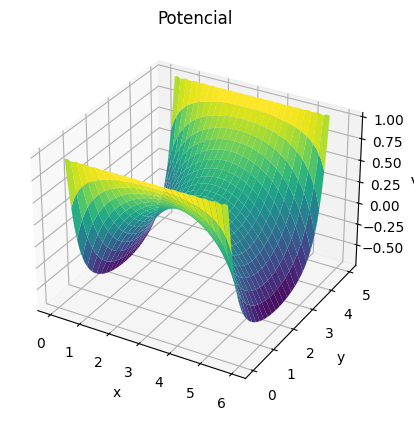

In [179]:
h = 1
a = (M + 1) * h
b = (N + 1) * h
P = 100

def potencial(x, y, P, a, b):
    z = 0
    for n in range(P + 1):
        z1 = (np.sinh((2 * n + 1) * np.pi * (a - x) / b) + np.sinh((2 * n + 1) * np.pi * x / b)) * np.sin((2 * n + 1) * np.pi * y / b) / np.sinh((2 * n + 1) * np.pi * a / b)
        z2 = (np.sinh((2 * n + 1) * np.pi * (b - y) / a) + np.sinh((2 * n + 1) * np.pi * y / a)) * np.sin((2 * n + 1) * np.pi * x / a) / np.sinh((2 * n + 1) * np.pi * b / a)
        z += (z2 - z1) * 4 / ((2 * n + 1) * np.pi)
    return z

x_vals = np.arange(0, a + 0.1, 0.1)
y_vals = np.arange(0, b + 0.1, 0.1)
x, y = np.meshgrid(x_vals, y_vals)

z = potencial(x, y, P, a, b)

fig = plt.figure()
ax = fig.add_subplot( projection='3d')
ax.plot_surface(x, y, z, cmap='viridis')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('V')
ax.set_title('Potencial')
plt.show()

